[0 1 2 3 4 5]
[ 0.   0.9  0.8  0.1 -0.4 -0.8]


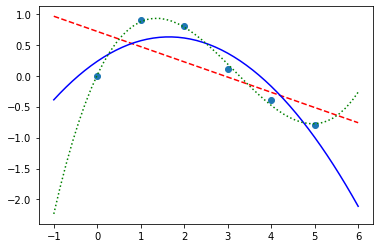

0.4802597402597403


In [11]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

x = np.array([0,1,2,3,4,5])
y = np.array([0,0.9,0.8,0.1,-0.4,-0.8])

print(x)
print(y)
#xy = zip(x,y)

#for x, y in xy:
 #   print(x)
  #  print(y)

p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,2)
p3 = np.polyfit(x,y,3)

plt.plot(x,y,'o')

xp = np.linspace(-1,6)

plt.plot(xp, np.polyval(p1, xp), 'r--')
plt.plot(xp, np.polyval(p2, xp), 'b-')
plt.plot(xp, np.polyval(p3, xp), 'g:')

plt.show()

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_error = linregress(x,y)

print(r_value ** 2)


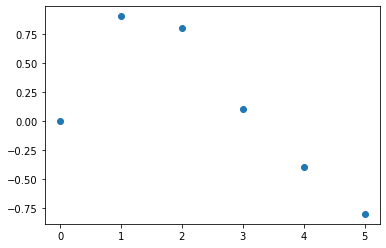

[[ 0. ]
 [ 0.9]
 [ 0.8]
 [ 0.1]
 [-0.4]
 [-0.8]]
[[ 0.71428571]
 [ 0.46857143]
 [ 0.22285714]
 [-0.02285714]
 [-0.26857143]
 [-0.51428571]]
rmse =  0.43654487578189327
r2  0.48025974025974016


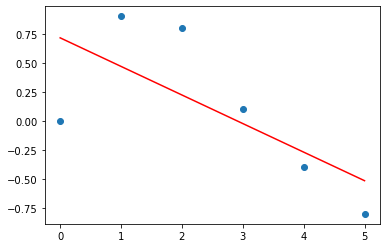

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([0,1,2,3,4,5])
y = np.array([0,0.9,0.8,0.1,-0.4,-0.8])

x = x[:,np.newaxis]
y = y[:,np.newaxis]

plt.scatter(x,y)

plt.show()

model = LinearRegression()

model.fit(x, y)

yPred = model.predict(x)

print(y)
print(yPred)

rmse = np.sqrt(mean_squared_error(y,yPred))

r2 = r2_score(y, yPred)

print ('rmse = ', rmse)
print ('r2 ', r2)

plt.scatter(x, y)
plt.plot(x, yPred, 'r-')

plt.show()


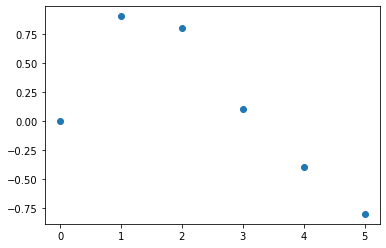

Linear
rmse =  0.43654487578189327
r2  0.48025974025974016
Poly
rmse =  1.4509921578918645e-13
r2  1.0


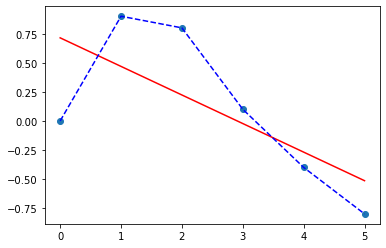

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = np.array([0,1,2,3,4,5])
y = np.array([0,0.9,0.8,0.1,-0.4,-0.8])

x = x[:,np.newaxis]
y = y[:,np.newaxis]


plt.scatter(x,y)

plt.show()

poly_features = PolynomialFeatures(degree=5)

xTrans = poly_features.fit_transform(x)

lin_model = LinearRegression()
poly_model = LinearRegression()

lin_model.fit(x,y)
poly_model.fit(xTrans, y)

linPred = lin_model.predict(x)

polyPred = poly_model.predict(xTrans)


rmse = np.sqrt(mean_squared_error(y,linPred))

r2 = r2_score(y,linPred)

print('Linear')
print ('rmse = ', rmse)
print ('r2 ', r2)


rmse = np.sqrt(mean_squared_error(y,polyPred))

r2 = r2_score(y,polyPred)

print('Poly')
print ('rmse = ', rmse)
print ('r2 ', r2)

plt.scatter(x,y)
plt.plot(x,linPred, 'r-')
plt.plot(x,polyPred, 'b--')

plt.show()

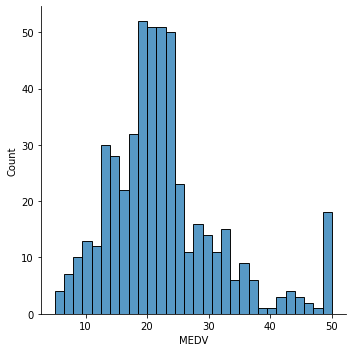

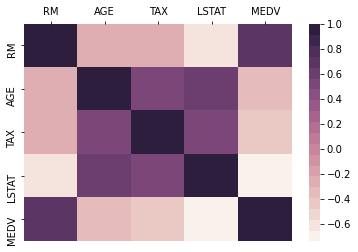

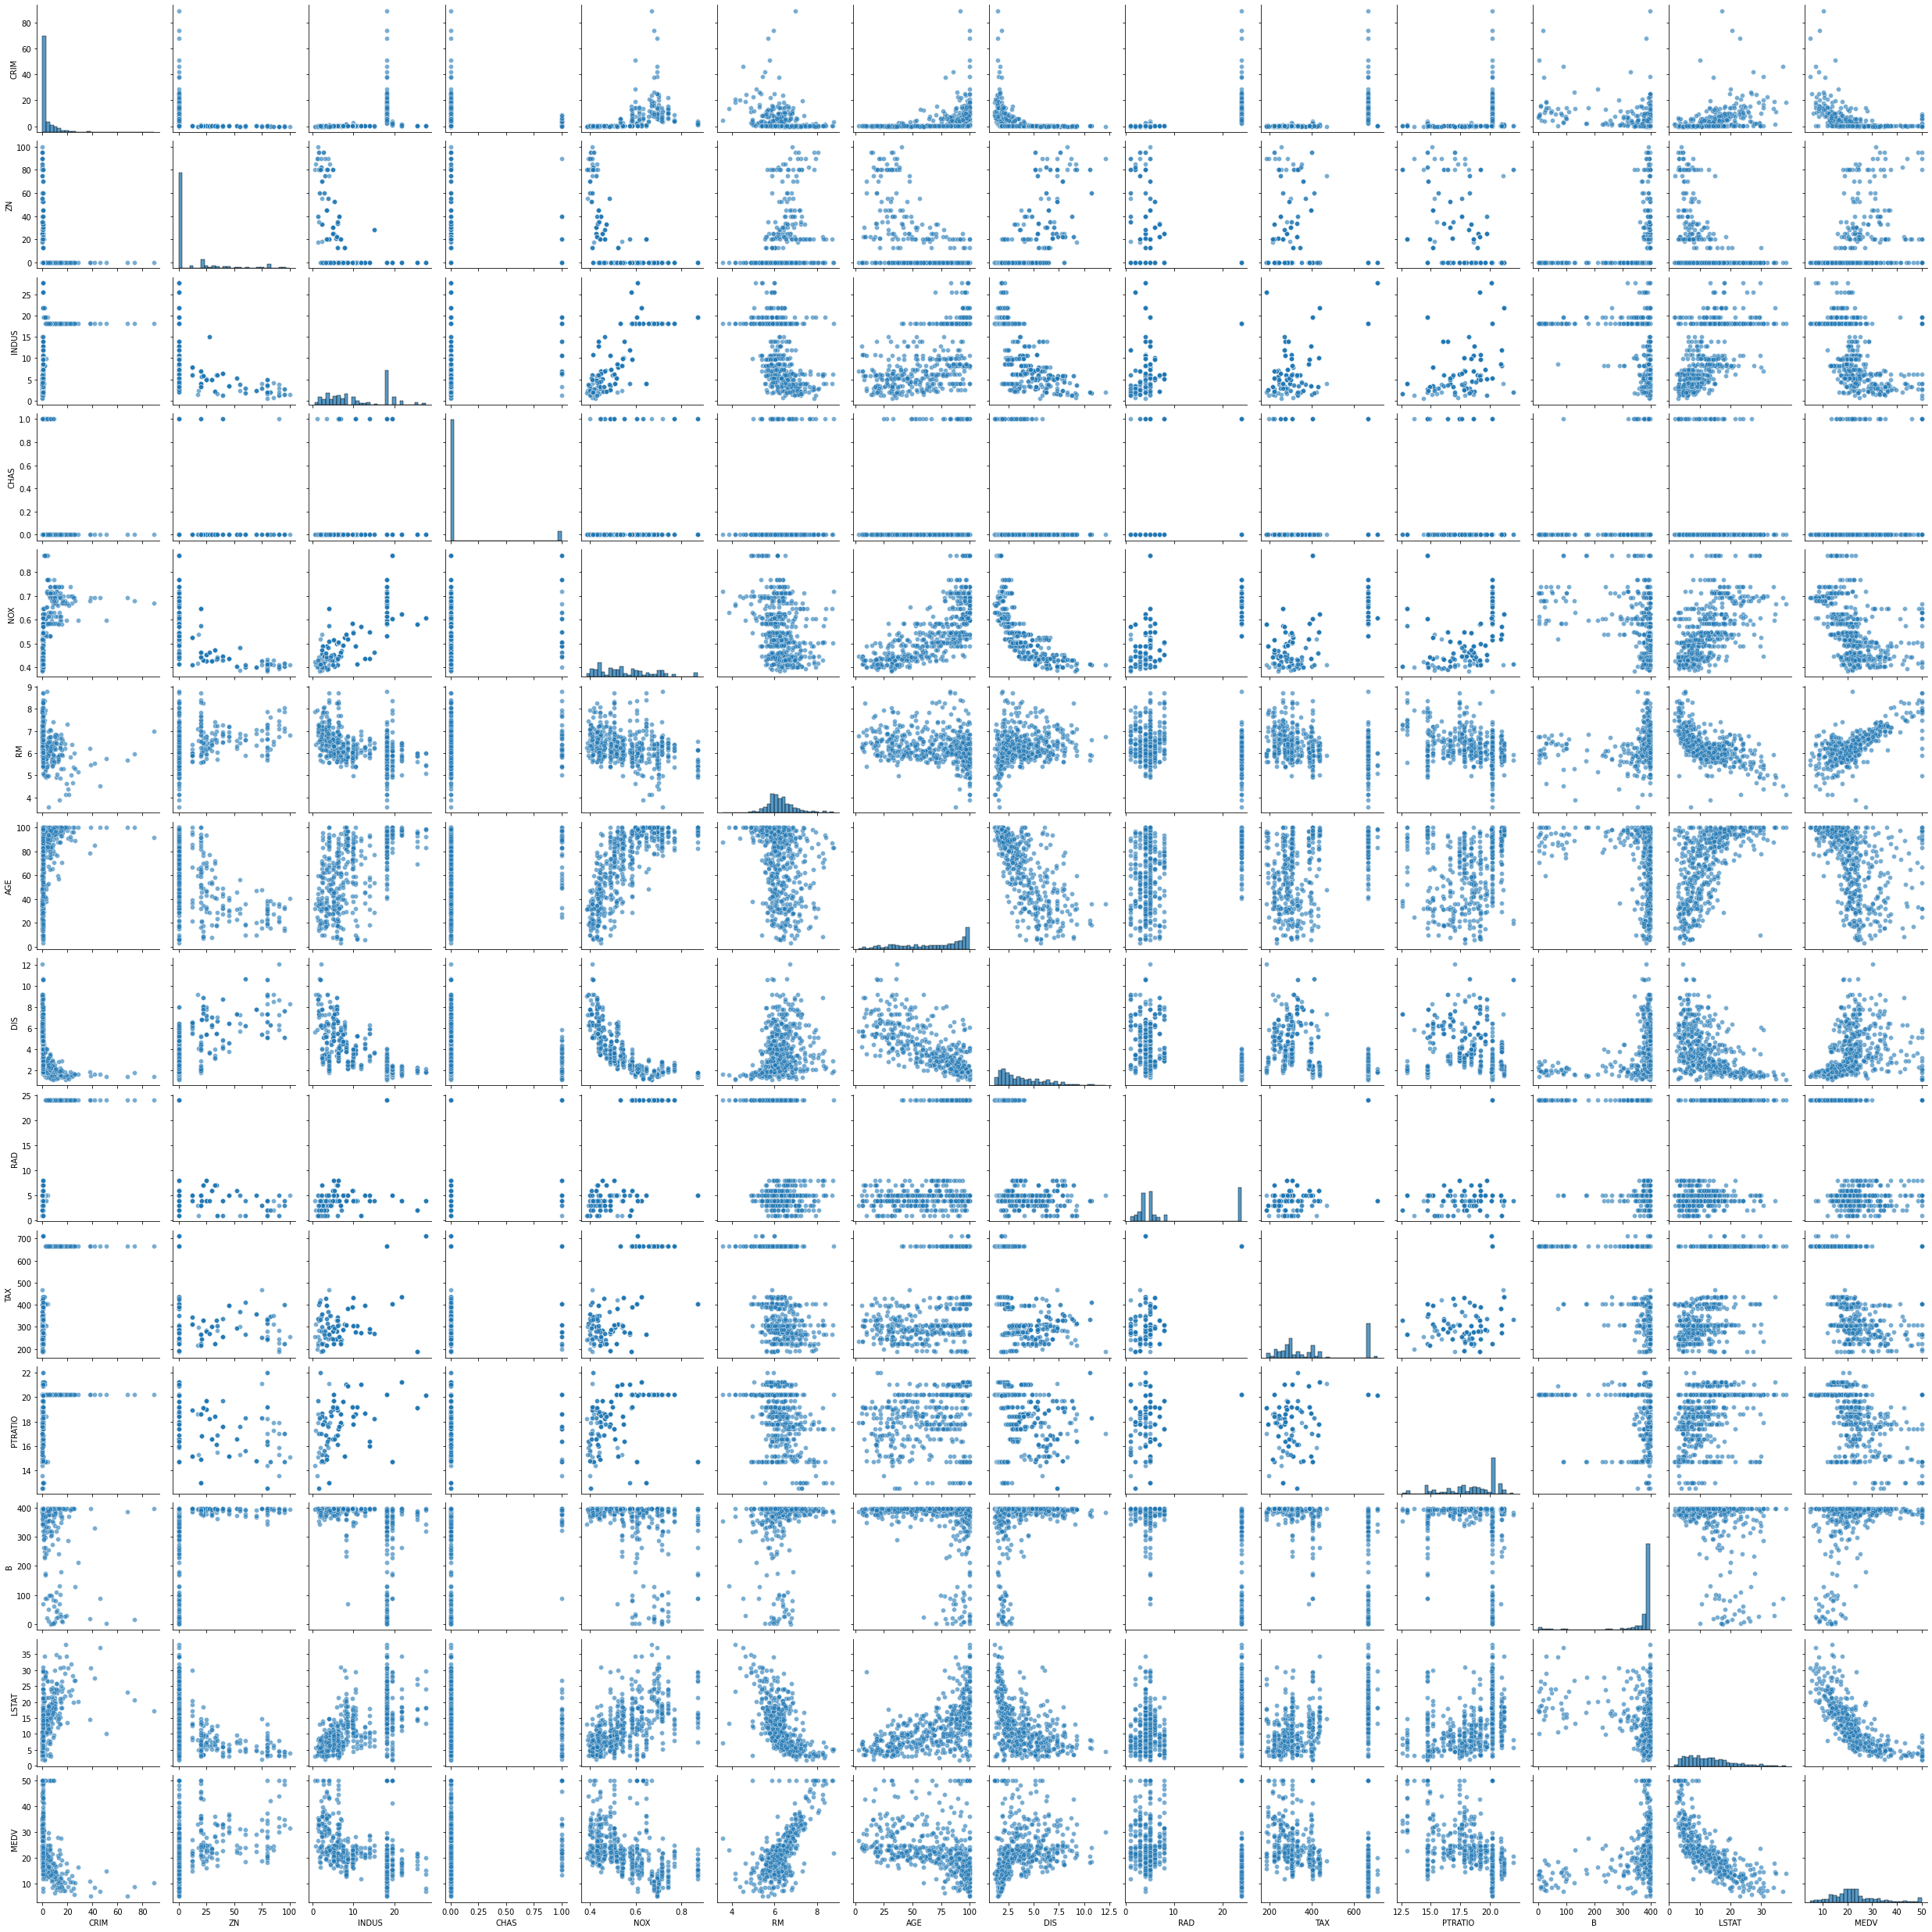

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

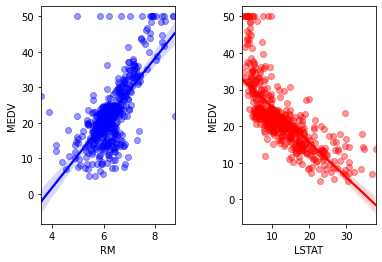

In [69]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

#boston.data.shape

#print(boston.feature_names)

#print (boston.DESCR)

df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

df['MEDV'] = boston['target']

df.dtypes

df.isnull().value_counts()

df.describe()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.displot(df['MEDV'], bins=30)
plt.show()


cols = ['RM','AGE', 'TAX','LSTAT', 'MEDV']
df[cols].corr()

ax = sns.heatmap(df[cols].corr(),
cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top() # move labels to the top

sns.pairplot(df,
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 
plt.show()

_, ax = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)
sns.regplot(x='RM', y='MEDV', data=df, ax=ax[0],
scatter_kws={'alpha': 0.4}, color='b')
sns.regplot(x='LSTAT', y='MEDV', data=df, ax=ax[1],
scatter_kws={'alpha': 0.4}, color='r')

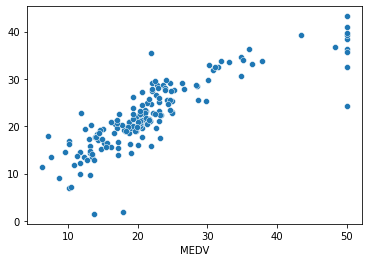

rmse =  5.0698549141760845
r2  0.7095191608579856


In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

df['MEDV'] = boston.target

df



x = df.drop('MEDV', axis =1)

#x = df[['RM', 'LSTAT', 'AGE', 'TAX', 'CRIM']]
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=32)

model = LinearRegression()

model.fit(x_train, y_train)

yPred= model.predict(x_test)

sns.scatterplot(x=y_test, y=yPred)

plt.show()

rmse = np.sqrt(mean_squared_error(y_test, yPred))

r2 = r2_score(y_test, yPred)


print ('rmse = ', rmse)
print ('r2 ', r2)